In [1]:
"""@author Okorie Ndubuisi June 2025"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score
from logisticregression import LogisticRegression # import my implementation of logistic regression
import seaborn as sns
import pandas as pd
sns.set_theme()

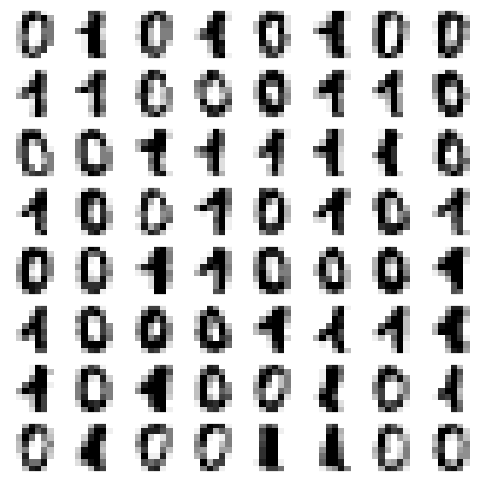

In [2]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=2)
fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [3]:
X = np.array(digits.data[:210, :], dtype=np.float64)
Y = digits.target[:210]

X_test = digits.data[210:, :]
Y_test = digits.target[210:]

In [4]:
X.shape

(210, 64)

In [5]:
X_test.shape

(150, 64)

In [6]:
model = LogisticRegression(activation='sigmoid')

In [7]:
lambda_ = 1
decimals = 8
model.fit(X, Y, learning_rate=1e-4, optimizer='adam', decay=False, 
              batch_size=-1, epochs=65, lambda_=lambda_, bias=True, verbose=True)

Epoch  1/65 Loss: 0.86686673   
Epoch  2/65 Loss: 0.84560396   
Epoch  3/65 Loss: 0.82489769   
Epoch  4/65 Loss: 0.80469708   
Epoch  5/65 Loss: 0.78498106   
Epoch  6/65 Loss: 0.76571480   
Epoch  7/65 Loss: 0.74688803   
Epoch  8/65 Loss: 0.72846189   
Epoch  9/65 Loss: 0.71041905   
Epoch 10/65 Loss: 0.69275938   
Epoch 11/65 Loss: 0.67548275   
Epoch 12/65 Loss: 0.65858815   
Epoch 13/65 Loss: 0.64201675   
Epoch 14/65 Loss: 0.62577838   
Epoch 15/65 Loss: 0.60987230   
Epoch 16/65 Loss: 0.59429654   
Epoch 17/65 Loss: 0.57904252   
Epoch 18/65 Loss: 0.56410686   
Epoch 19/65 Loss: 0.54948798   
Epoch 20/65 Loss: 0.53518335   
Epoch 21/65 Loss: 0.52119095   
Epoch 22/65 Loss: 0.50750782   
Epoch 23/65 Loss: 0.49413146   
Epoch 24/65 Loss: 0.48105865   
Epoch 25/65 Loss: 0.46828635   
Epoch 26/65 Loss: 0.45581106   
Epoch 27/65 Loss: 0.44362936   
Epoch 28/65 Loss: 0.43173743   
Epoch 29/65 Loss: 0.42013156   
Epoch 30/65 Loss: 0.40880765   
Epoch 31/65 Loss: 0.39776171   
Epoch 32

In [8]:
model.params['weights'][:5]

array([[-0.00014649,  0.00015251],
       [-0.02790429,  0.02444683],
       [-0.01508053, -0.00666295],
       [ 0.01593088, -0.01598297],
       [-0.01202435,  0.0126183 ]])

In [9]:
model.params['bias']

array([[-0.02055273,  0.0173908 ]])

In [10]:
test_predictions = model.predict(X_test, -1)

In [11]:
test_accuracy = (len(Y_test[np.where(Y_test == test_predictions)]) / len(Y_test)) * 100
test_accuracy

98.66666666666667

In [13]:
#Using scik-learn
accuracy_score(Y_test, test_predictions) * 100

98.66666666666667

In [14]:
print('First 10 predictions of our model:', test_predictions[:10])
print('First 10 values of y test label:  ', Y_test[:10])

First 10 predictions of our model: [1 0 0 1 1 0 0 0 1 1]
First 10 values of y test label:   [1 0 0 1 1 0 0 0 1 1]


In [15]:
idx = np.where(Y_test != test_predictions)
correct_labels = Y_test[idx]
incorrect_labels = test_predictions[idx]
Incorrect_X = X[idx]
incorrect_img = digits.images[idx]

In [16]:
incor_len = len(incorrect_labels)
incor_len

2

In [17]:
correct_labels = Y_test[Y_test == test_predictions]

In [18]:
len(correct_labels)

148

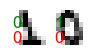

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(1, 2))
for i, axi in enumerate(ax.flat):
    axi.axis('off')
    if i >= len(incorrect_labels):
        continue
    axi.imshow(incorrect_img[i], cmap='binary')
    axi.text(0.05, 0.05, str(incorrect_labels[i]), transform=axi.transAxes, color='red')
    axi.text(0.05, 0.5, str(correct_labels[i]), transform=axi.transAxes, color='green')

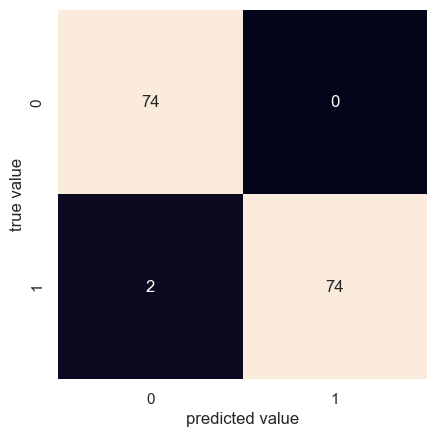

In [21]:
confusion_mat = confusion_matrix(Y_test, test_predictions)
sns.heatmap(confusion_mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [22]:
train_predictions = model.predict(X, -1)

In [23]:
train_accuracy = (len(Y[np.where(Y == train_predictions)]) / len(Y)) * 100
train_accuracy

100.0

In [24]:
correct_labels = Y[Y == train_predictions]

In [25]:
len(correct_labels)

210

In [26]:
print('First 10 predictions of our model on train X:', train_predictions[:10])
print('First 10 values of y train label:            ', Y[:10])

First 10 predictions of our model on train X: [0 1 0 1 0 1 0 0 1 1]
First 10 values of y train label:             [0 1 0 1 0 1 0 0 1 1]


In [27]:
costs = np.array(model.costs)
costs.shape

(65,)

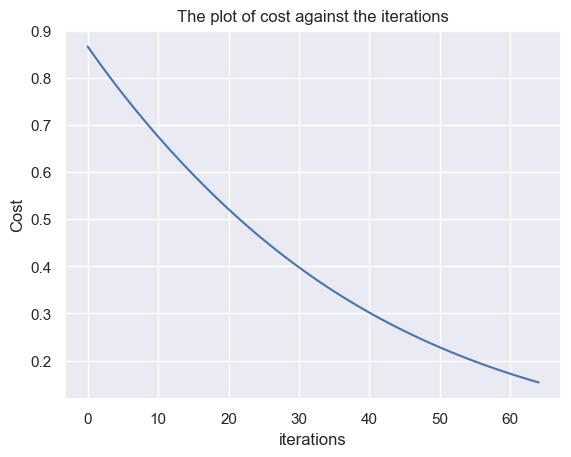

In [28]:
plt.plot(np.arange(len(model.iterations)), costs)
plt.title('The plot of cost against the iterations')
plt.xlabel('iterations')
plt.ylabel('Cost')
plt.show();

In [30]:
model.save('binary_handwritten_digits_model.pkl')

Model saved to binary_handwritten_digits_model.pkl


In [31]:
loaded_model = model.load('binary_handwritten_digits_model.pkl')

Model loaded from binary_handwritten_digits_model.pkl


In [32]:
test_predictions = loaded_model.predict(X_test, -1)
test_accuracy = (len(Y_test[np.where(Y_test == test_predictions)]) / len(Y_test)) * 100
test_accuracy

98.66666666666667

In [33]:
train_predictions = loaded_model.predict(X, -1)
train_accuracy = (len(Y[np.where(Y == train_predictions)]) / len(Y)) * 100
train_accuracy

100.0